<div align="justify">
  <h1> Modelagem do Sistema Cardiovascular Humano - ECOM168 </h1>
  <h2><b> Projeto 1 </b></h2>
  <h3> Prof. Thiago Cordeiro</h3>
  <h4><b>Alunos</b></h4>

  <b><i>Ruan Heleno Correa da Silva - 18112344</i></b>

  <b><i>Derek Nielsen Araújo Alves - 17212092 </i></b>

  <b><i>João Pedro Brito Tomé - 18112204</i></b>

  <b><i>John Davi Dutra Canuto Pires - 18112206</i></b>

  <b><i>Matheus Ferreira Gêda - 18112339</i></b>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

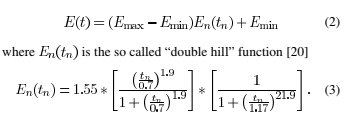

In [ ]:
def elastance(t, tc, t_max):
  tn = np.asarray(t) % tc / t_max;
  En = 1.55 * np.power(np.asarray(tn)/.7, 1.9) / (1 + np.power(np.asarray(tn)/.7, 1.9)) / (1 + np.power(np.asarray(tn)/1.17, 21.9))
  return (Emax-Emin) * En + Emin

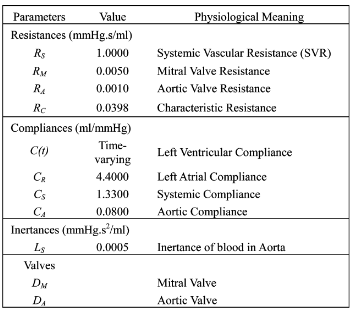

In [ ]:
start_t = 0 
passo = 0.0001
end_t = 4

T = list(np.arange(start_t,end_t,passo))
n = len(T)

HR = 120
Emax = 2
Emin = 0.06
tc = 60/HR # intervalo entre cada ciclo cardíaco
t_max = 0.2 + 0.15 * tc 

E = elastance(T, tc, t_max) # Normalização da elastância

# Parâmetros fornecidos pelo artigo Simaan

Rs  = 1.0000 # Systemic Vascular Resistance (SVR)
Rm  = 0.0050 # Mitral Valve Resistance
Cae = 4.4000 # Left Atrial Compliance
Ra  = 0.0010 # Aortic Valve Resistance
Rc  = 0.0398 # Characteristic Resistance
Cs  = 1.3300 # Systemic Compliance
Cao = 0.0800 # Aortic Compliance
Ls  = 0.0005 # Inertance of blood in Aorta

Vo = 10 # Pressão Inicial

Pao = np.zeros_like(T)
Qa  = np.zeros_like(T)
Vve = np.zeros_like(T)
Pas = np.zeros_like(T)
Pae = np.zeros_like(T)
Pve = np.zeros_like(T)

# Condições Iniciais
Pao[0] = 90
Qa[0]  = 0
Vve[0] = 140 
Pas[0] = 90
Pae[0] = 5

Pve[0] = E[0]* (Vve[0] - Vo) 

x = np.transpose([Pao[0], Qa[0], Vve[0], Pas[0], Pae[0]])

Dm = 0
Da = 0

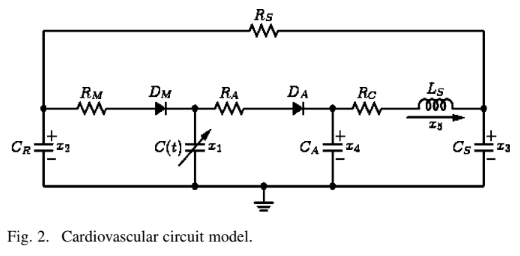

In [ ]:
for i in range(n-1):
  Dm = 1 if Pae[i] >= Pve[i] else 0
  Da = 1 if Pve[i] >= Pao[i] else 0
 
  A = [[0], [0], [0], [0], [0]]
  A[0] = [-((Da)/(Ra)), -1, (Da)/(Ra) * (E[i]), 0, 0]/np.array(Cao)
  A[1] = [1, -(Rc), 0, -1, 0]/np.array(Ls)
  A[2] = [(Da)/(Ra), 0, -(((Dm)/(Rm)) + ((Da)/(Ra)))*E[i], 0, (Dm)/(Rm)]
  A[3] = [0, 1, 0, -1/(Rs), 1/(Rs)]/np.array(Cs)
  A[4] = [0, 0, (Dm)/(Rm) * E[i], 1/(Rs), -((1/(Rs))+((Dm)/(Rm)))]/np.array(Cae)
  
  B = [-(((Da)/(Ra))*E[i]*Vo)/Cao,
        0,
        ((Dm)/(Rm) + (Da)/(Ra))*E[i]*Vo,
        0,
        ( -((Dm)/(Rm))*E[i]*Vo)/Cae]

  xdot = np.dot(A, x) + B
  kx1 = passo*xdot

  x1 = x + 0.5*kx1
  xdot = np.dot(A, x1) + B
  kx2 = passo*xdot
  
  x1 = x + 0.5*kx2
  xdot = np.dot(A, x1) + B
  kx3 = passo*xdot

  x1 = x + kx3
  xdot = np.dot(A, x1) + B
  kx4 = passo*xdot

  x = x + (kx1 + 2*kx2 + 2*kx3 + kx4)/6
  
  Pao[i+1] =  x[0]
  Qa[i+1]  =  x[1]
  Vve[i+1] =  x[2]
  Pas[i+1] =  x[3]
  Pae[i+1] =  x[4]
  Pve[i+1] = E[i+1] * (Vve[i+1] - Vo)

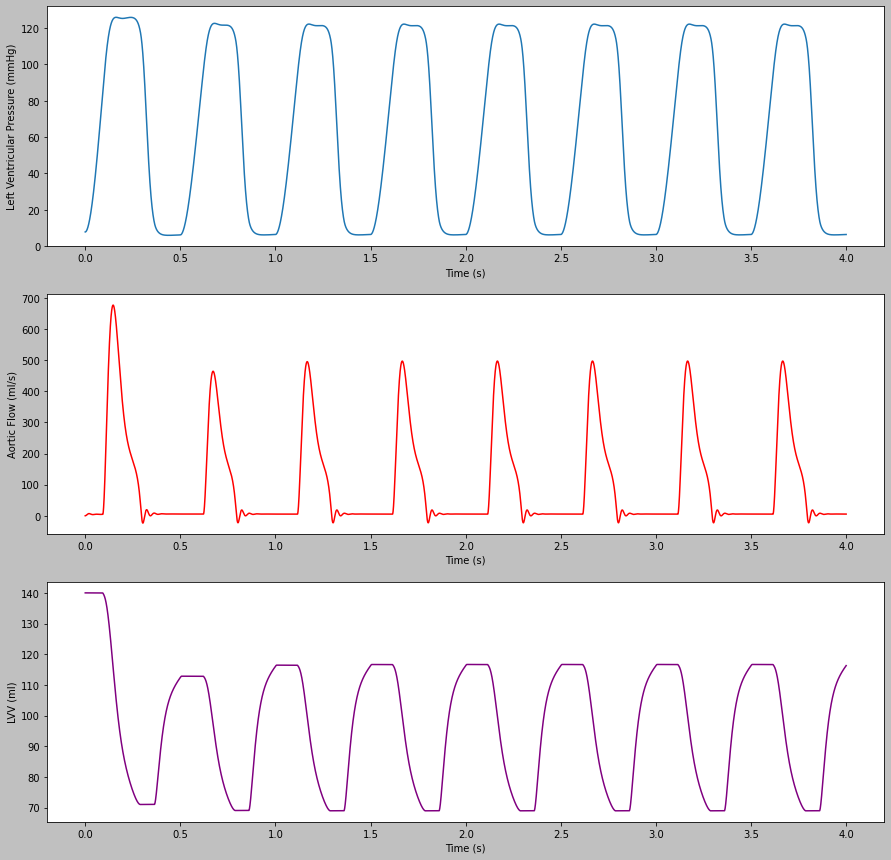

In [ ]:
plt.figure(figsize=(15,15), facecolor="silver")
plt.subplot(3,1,1)
plt.plot(T, Pve) # pressao ventriculo esquerdo
plt.ylabel("Left Ventricular Pressure (mmHg)")
plt.xlabel("Time (s)")

plt.subplot(3,1,2)
plt.plot(T, Qa, color="red") # Fluxo na aorta
plt.ylabel("Aortic Flow (ml/s)")
plt.xlabel("Time (s)")

plt.subplot(3,1,3)
plt.plot(T, Vve, color="purple") # volume ventriculo esquerdo
plt.ylabel("LVV (ml)")
plt.xlabel("Time (s)")

plt.show()